# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from newsapi import NewsApiClient
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import pickle
from pathlib import Path

from nltk.corpus import stopwords, reuters

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/krbyland/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
api_key = os.getenv("news_api")

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
btc_path = Path('btc_news.obj')
if btc_path.is_file():
    file = open(btc_path, 'rb')
    bitcoin_headlines = pickle.load(file)
    file.close()
else:
    bitcoin_headlines = newsapi.get_everything(
        q="bitcoin",
        language="en",
        page_size=100,
        sort_by="relevancy"
    )
    file = open(btc_path, 'wb') 
    pickle.dump(bitcoin_headlines, file)
    file.close()

In [5]:
print(f"Total articles about bitcoin: {bitcoin_headlines['totalResults']}")

Total articles about bitcoin: 6690


In [6]:
eth_path = Path('eth_news.obj')
if eth_path.is_file():
    file = open(eth_path, 'rb')
    ethereum_headlines = pickle.load(file)
    file.close()
else:
    ethereum_headlines = newsapi.get_everything(
        q="ethereum",
        language="en",
        page_size=100,
        sort_by="relevancy"
    )
    file = open(eth_path, 'wb') 
    pickle.dump(ethereum_headlines, file)
    file.close()

In [7]:
print(f"Total articles about ethereum: {ethereum_headlines['totalResults']}")

Total articles about ethereum: 2611


In [8]:
ethereum_headlines["articles"][0]

{'source': {'id': 'the-verge', 'name': 'The Verge'},
 'author': 'Kim Lyons',
 'title': 'China’s central bank bans cryptocurrency transactions to avoid ‘risks’',
 'description': 'China’s central bank on Friday said cryptocurrency transactions in the country are illegal, banning all transactions. It said cryptocurrencies like bitcoin and Ethereum are not legal tender and can’t be circulated.',
 'url': 'https://www.theverge.com/2021/9/24/22691472/china-central-bank-cryptocurrency-illegal-bitcoin',
 'urlToImage': 'https://cdn.vox-cdn.com/thumbor/mde_l3lUC4muDPEFG7LYrUz0O3g=/0x146:2040x1214/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/8921023/acastro_bitcoin_2.jpg',
 'publishedAt': '2021-09-24T16:22:55Z',
 'content': 'Its the countrys latest crackdown on digital currencies\r\nIllustration by Alex Castro / The Verge\r\nThe Peoples Bank of China, the countrys central bank, said Friday that cryptocurrency transactions ar… [+1461 chars]'}

In [9]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,date,text,compound,positive,negative,neutral
0,2021-09-16,You won't have to stick to Bitcoin if you're d...,0.5574,0.127,0.036,0.838
1,2021-09-23,Four months after Twitter first introduced in-...,0.0000,0.000,0.000,1.000
2,2021-10-06,"<ul><li>Bitcoin, in terms of market value, ros...",0.3400,0.076,0.000,0.924
3,2021-09-25,Bitcoin and similar blockchain-based cryptos e...,0.0000,0.000,0.000,1.000
4,2021-10-04,JPMorgan CEO Jamie Dimon is still not a Bitcoi...,-0.2411,0.000,0.116,0.884


In [10]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2021-09-24,Its the countrys latest crackdown on digital c...,0.0000,0.000,0.000,1.000
1,2021-09-16,You won't have to stick to Bitcoin if you're d...,0.5574,0.127,0.036,0.838
2,2021-09-16,OpenSea isn't wasting much time after its head...,0.2865,0.180,0.126,0.694
3,2021-09-22,Robinhood plans to start a cryptocurrency wall...,0.4588,0.108,0.000,0.892
4,2021-09-25,"image source, foundation.app/@SideEyeingChloe\...",0.4215,0.101,0.000,0.899


In [11]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.125641,0.054510,0.023320,0.922180
std,0.328892,0.060971,0.046298,0.073338
min,-0.709600,0.000000,0.000000,0.702000
25%,0.000000,0.000000,0.000000,0.874250
50%,0.000000,0.044500,0.000000,0.930000
75%,0.366000,0.096250,0.034500,1.000000
max,0.855500,0.240000,0.215000,1.000000


In [12]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.134839,0.063370,0.028510,0.908140
std,0.353060,0.070687,0.048665,0.086672
min,-0.757900,0.000000,0.000000,0.692000
25%,0.000000,0.000000,0.000000,0.841000
50%,0.000000,0.060500,0.000000,0.922500
75%,0.421500,0.108000,0.050250,1.000000
max,0.941300,0.308000,0.188000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Ethereum

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [13]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [14]:

# Instantiate the lemmatizer

# Create a list of stopwords

def tokenizer(article):
    lemmatizer = WordNetLemmatizer()
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', article)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return output

# Expand the default stopwords list if necessary
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [15]:
# Create a new tokens column for Bitcoin
bitcoin_df["tokens"] = bitcoin_df["text"].apply(tokenizer)
bitcoin_df

,date,text,compound,positive,negative,neutral,tokens
0,2021-09-16,You won't have to stick to Bitcoin if you're d...,0.5574,0.127,0.036,0.838,"[wont, stick, bitcoin, youre, determined, pay,..."
1,2021-09-23,Four months after Twitter first introduced in-...,0.0000,0.000,0.000,1.000,"[four, month, twitter, first, introduced, inap..."
2,2021-10-06,"<ul><li>Bitcoin, in terms of market value, ros...",0.3400,0.076,0.000,0.924,"[ullibitcoin, term, market, value, rose, lilii..."
3,2021-09-25,Bitcoin and similar blockchain-based cryptos e...,0.0000,0.000,0.000,1.000,"[bitcoin, similar, blockchainbased, cryptos, e..."
4,2021-10-04,JPMorgan CEO Jamie Dimon is still not a Bitcoi...,-0.2411,0.000,0.116,0.884,"[jpmorgan, ceo, jamie, dimon, still, bitcoin, ..."
...,...,...,...,...,...,...,...
95,2021-09-20,(Bloomberg) -- Cryptocurrency prices slumped a...,-0.7003,0.000,0.177,0.823,"[bloomberg, cryptocurrency, price, slumped, br..."
96,2021-09-27,Representations of cryptocurrencies Bitcoin an...,0.0000,0.000,0.000,1.000,"[representations, cryptocurrencies, bitcoin, e..."
97,2021-09-16,"NEW YORK, Sept 16 (Reuters) - El Salvador bond...",-0.0706,0.096,0.103,0.801,"[new, york, sept, reuters, el, salvador, bond,..."
98,2021-09-20,Yuriko Nakao/Getty Images\r\nBitcoin fell belo...,-0.3612,0.000,0.077,0.923,"[yuriko, nakaogetty, imagesbitcoin, fell, broa..."


In [16]:
# Create a new tokens column for Ethereum
ethereum_df["tokens"] = ethereum_df["text"].apply(tokenizer)
ethereum_df

,date,text,compound,positive,negative,neutral,tokens
0,2021-09-24,Its the countrys latest crackdown on digital c...,0.0000,0.000,0.000,1.000,"[country, latest, crackdown, digital, currenci..."
1,2021-09-16,You won't have to stick to Bitcoin if you're d...,0.5574,0.127,0.036,0.838,"[wont, stick, bitcoin, youre, determined, pay,..."
2,2021-09-16,OpenSea isn't wasting much time after its head...,0.2865,0.180,0.126,0.694,"[opensea, isnt, wasting, much, time, head, pro..."
3,2021-09-22,Robinhood plans to start a cryptocurrency wall...,0.4588,0.108,0.000,0.892,"[robinhood, plan, start, cryptocurrency, walle..."
4,2021-09-25,"image source, foundation.app/@SideEyeingChloe\...",0.4215,0.101,0.000,0.899,"[image, source, foundationappsideeyeingchloeim..."
...,...,...,...,...,...,...,...
95,2021-10-08,Fair warning: This is going to be a lengthy an...,0.6428,0.167,0.041,0.792,"[fair, warning, going, lengthy, analysis, prom..."
96,2021-09-21,150 coins have a value of approximately $6.4 m...,0.5859,0.127,0.000,0.873,"[coin, value, approximately, million, us, doll..."
97,2021-09-20,The total crypto complex was down over $200 bi...,-0.2023,0.108,0.129,0.763,"[total, crypto, complex, wa, billion, monday, ..."
98,2021-09-24,Securities and Exchange Commission Chair Gary ...,0.2960,0.068,0.000,0.932,"[securities, exchange, commission, chair, gary..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [17]:
from collections import Counter
from nltk import ngrams

In [18]:
btc_tokens = []
for token in bitcoin_df['tokens']:
    btc_tokens = btc_tokens + token

In [19]:
btc_tokens[0]

'wont'

In [20]:
# Generate the Bitcoin N-grams where N=2
btc_bigrams = ngrams(btc_tokens, n=2)
Counter(btc_bigrams).most_common(10)

[(('illustration', 'taken'), 14),
 (('sept', 'reuters'), 10),
 (('el', 'salvador'), 9),
 (('char', 'representation'), 9),
 (('bitcoin', 'seen'), 9),
 (('seen', 'illustration'), 9),
 (('reuters', 'bitcoin'), 9),
 (('cryptocurrency', 'bitcoin'), 8),
 (('representation', 'cryptocurrency'), 7),
 (('taken', 'august'), 7)]

In [21]:
# Generate the Ethereum N-grams where N=2
eth_tokens = []
for token in ethereum_df['tokens']:
    eth_tokens = eth_tokens + token

In [22]:
eth_tokens[0]

'country'

In [23]:
eth_bigrams = ngrams(eth_tokens, n=2)
Counter(eth_bigrams).most_common(10)

[(('illustration', 'taken'), 13),
 (('nonfungible', 'token'), 10),
 (('char', 'representations'), 9),
 (('taken', 'june'), 9),
 (('representations', 'cryptocurrencies'), 8),
 (('bitcoin', 'ethereum'), 8),
 (('cryptocurrencies', 'bitcoin'), 7),
 (('ripple', 'litecoin'), 7),
 (('placed', 'pc'), 7),
 (('pc', 'motherboard'), 7)]

In [24]:
type(eth_bigrams)

zip

In [25]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [26]:
# Use token_count to get the top 10 words for Bitcoin
token_count(btc_bigrams)

[]

In [27]:
# Use token_count to get the top 10 words for Ethereum
token_count(eth_bigrams)

[]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

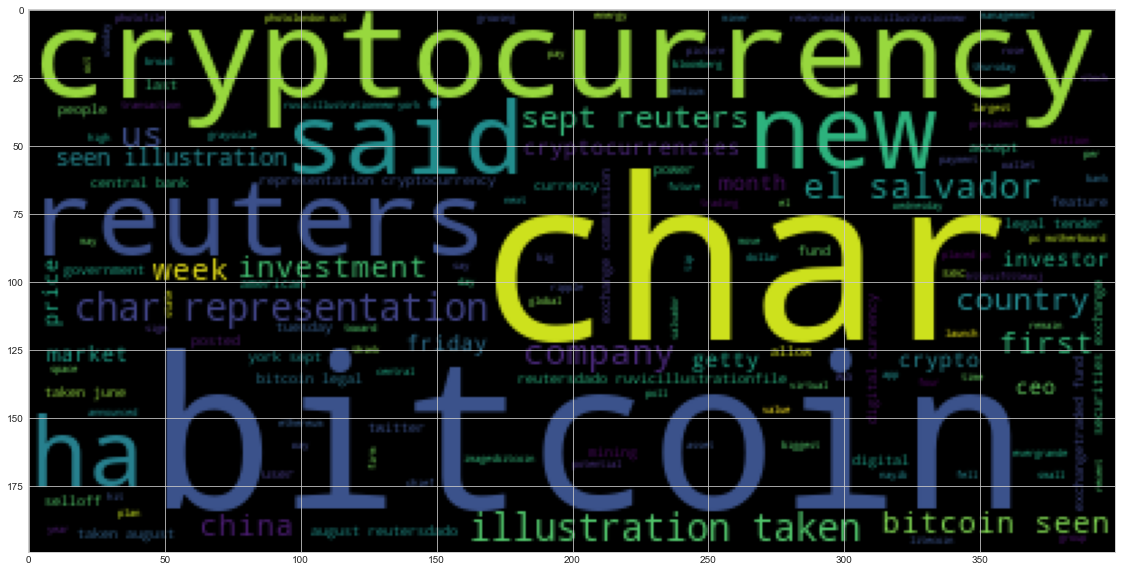

In [29]:
# Generate the Bitcoin word cloud

corpus = btc_tokens

btc_news = ' '.join(corpus)

wc = WordCloud().generate(btc_news)
plt.imshow(wc)

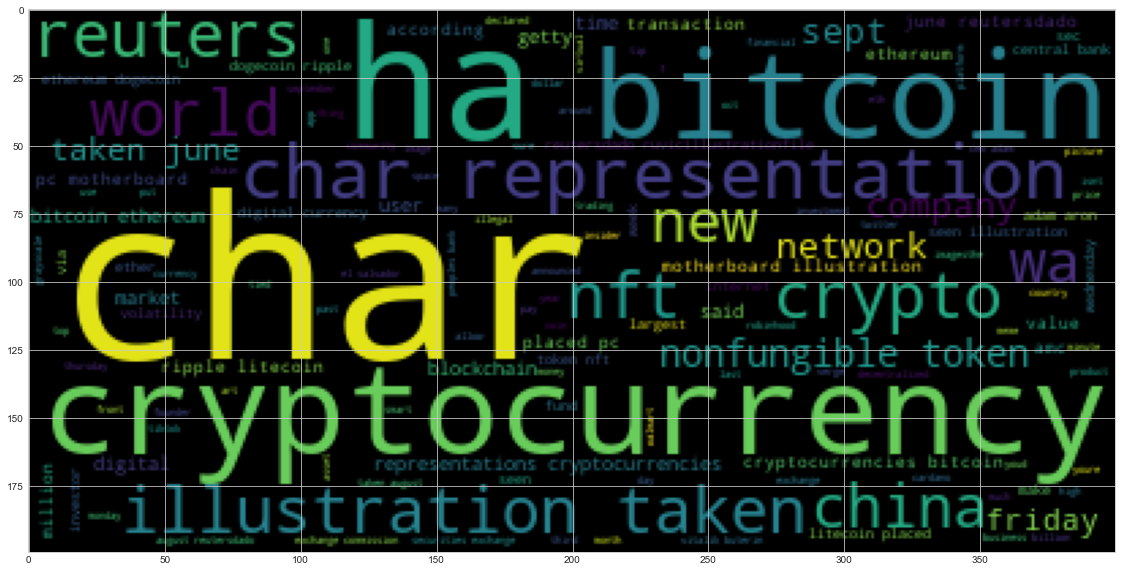

In [30]:
# Generate the Ethereum word cloud
corpus = eth_tokens

eth_news = ' '.join(corpus)

wc = WordCloud().generate(eth_news)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [31]:
import spacy
from spacy import displacy

In [32]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 13.6 MB 6.1 MB/s eta 0:00:01    |█████████████████▎              | 7.4 MB 2.8 MB/s eta 0:00:03
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [33]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [34]:
# Run the NER processor on all of the text
doc = nlp(btc_news)

# Add a title to the document

doc.user_data['title']="Bitcoin: Commonly Used Words"

In [35]:
# Render the visualization
displacy.render(doc, style='ent')

In [36]:
# List all Entities
btc_entities = [ent.text for ent in doc.ents if ent.label_ in ['GPE']]

In [37]:
btc_entities

['china',
 'el salvador',
 'electro',
 'uk',
 'canada',
 'alberta',
 'china',
 'anastasia',
 'el salvadors',
 'el salvador',
 'el salvador',
 'ruvicillustrationnew york',
 'ruvicillustrationnew york',
 'china',
 'hawaii',
 'new york el',
 'el salvador',
 'united states',
 'reuters',
 'el salvador',
 'el salvador',
 'new york',
 'new york',
 'australia',
 'el zonte el',
 'massachusetts',
 'hampshire',
 'connecticut',
 'washington',
 'ruvicillustrationnew york',
 'machinesfederico',
 'miami',
 'miami',
 'china',
 'china',
 'new york',
 'reuters',
 'el salvador']

---

### Ethereum NER

In [38]:
# Run the NER processor on all of the text
doc = nlp(eth_news)

# Add a title to the document

doc.user_data['title']="Ethereum: Commonly Used Words"


In [39]:
# Render the visualization
displacy.render(doc, style='ent')

In [40]:
# List all Entities
eth_entities = [ent.text for ent in doc.ents if ent.label_ in ['GPE']]

---

In [41]:
eth_entities

['china',
 'el salvador',
 'ruvicillustrationnew york',
 'china',
 'compan',
 'london',
 'ruvicillustrationnew york',
 'china',
 'china',
 'ruvicillustrationnew york',
 'china',
 'china',
 'china',
 'hawaii',
 'new york el']